In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

messages = pd.read_csv(r"C:\Users\HP\Downloads\sms+spam+collection\SMSSpamCollection", sep='\t',
                           names=["label", "message"])

In [2]:
print(messages)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [7]:
messages.drop_duplicates()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
messages["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
messages["message"].value_counts()

Sorry, I'll call later                                                                                                                                         30
I cant pick the phone right now. Pls send a message                                                                                                            12
Ok...                                                                                                                                                          10
Okie                                                                                                                                                            4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                        4
                                                                                                                                                               ..
No. On the way home. So if n

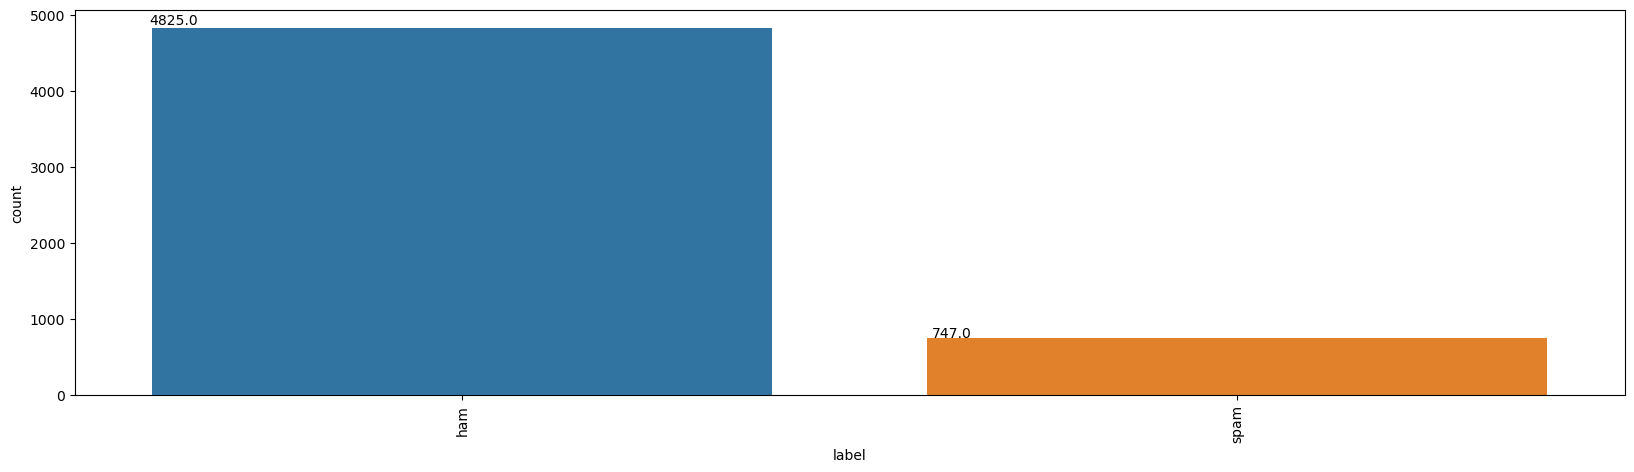

In [10]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="label", data=messages)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

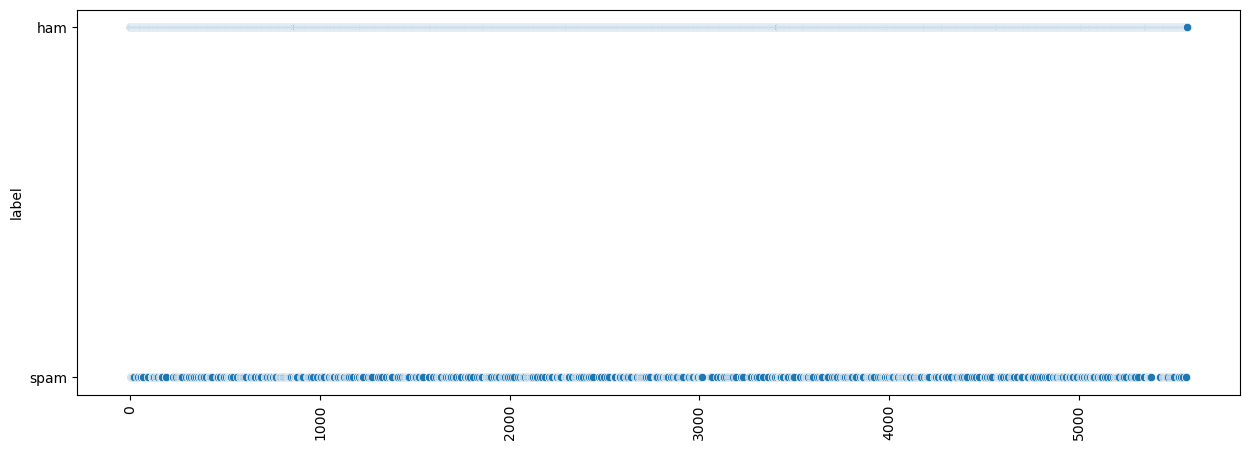

In [11]:
plt.figure(figsize=(15,5))
sns.scatterplot(messages["label"])
plt.xticks(rotation=90)
plt.show()

In [12]:
messages['label'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
messages['message'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [14]:

import re
import nltk

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
        
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [17]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [18]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values


In [20]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [21]:
# # Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [22]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [25]:
y_test

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

# 1st model

In [26]:
 # Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)



In [27]:
spam_detect_model

MultinomialNB()

In [28]:
y_pred=spam_detect_model.predict(X_test)

In [29]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print(accuracy_score(y_test, y_pred))

0.9856502242152466


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [34]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.9856502242152466


In [35]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[946   9]
 [  7 153]]


In [36]:
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.96      0.95       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# 2nd model

In [37]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [38]:
X_train2, X_test2

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [39]:
y_train2, y_test2

(array([0, 0, 0, ..., 1, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 1, 0], dtype=uint8))

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score

In [41]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train2, y_train2)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [42]:
ypred2 = clf.predict(X_test2)
ypred2

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [43]:
print(accuracy_score(y_test2, ypred2))

0.9255605381165919


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
accuracy = accuracy_score(y_test2, ypred2)
conf_matrix = confusion_matrix(y_test2, ypred2)
classification_rep = classification_report(y_test2, ypred2)

In [46]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.9255605381165919


In [47]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[955   0]
 [ 83  77]]


In [48]:
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       955
           1       1.00      0.48      0.65       160

    accuracy                           0.93      1115
   macro avg       0.96      0.74      0.80      1115
weighted avg       0.93      0.93      0.91      1115



# model evaluation 

In [49]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [50]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
import nltk

In [54]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'NB' : GaussianNB(),
    'OKNN': OneVsRestClassifier(KNeighborsClassifier()),
    'KM': KMeans(),
    
}

In [52]:
for model_name, model in models.items():
    model.fit(X_train3, y_train3)
    y_pred3 = model.predict(X_test3)
    
    accuracy = accuracy_score(y_test3, y_pred3)
    classification_rep = classification_report(y_test3, y_pred3)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_rep)
    print("=" * 50)

Model: Random Forest
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.89      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.98      0.98      1115

Model: Gradient Boosting
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       955
           1       0.99      0.83      0.90       160

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Model: SVM
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.89      0.94       160

    accurac

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Model: KM
Accuracy: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.00      0.00       955
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.00      1115
   macro avg       0.01      0.00      0.00      1115
weighted avg       0.04      0.00      0.00      1115



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.